<a href="https://colab.research.google.com/github/miladxo/Machine-Learning-Project/blob/main/Sentiment_analysis_of_tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install dependencies

In [1]:
!pip install -q transformers tweepy wordcloud matplotlib
!pip3 install emoji==0.6.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-0.6.0-py3-none-any.whl size=49719 sha256=05334bd758484c06ef3177f9cdd66177db05a67cd398431b6d159e6f900c2db7
  Stored in directory: /root/.cache/pip/wheels/1b/bd/d9/310c33c45a553798a714e27e3b8395d37128425442b8c78e07
Successfully built emoji


# Twitter API credentials



In [2]:
import tweepy

# Add Twitter API key and secret
consumer_key = "WgddDBIcwgsTEDvOfZNuHX8Tj"
consumer_secret = "THgWliQ5WjEBqeNdem95fWQmlmZoEgeDSRuYtfnvID8I1WzaGl"

# Handling authentication with Twitter
auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)

# Create a wrapper for the Twitter API
api = tweepy.API(auth, wait_on_rate_limit=True)

# Search for tweets using Tweepy

In [3]:
# Helper function for handling pagination in our search and handle rate limits
def limit_handled(cursor):
    while True:
        try:
            yield cursor.next()
        except tweepy.RateLimitError:
            print('Reached rate limite. Sleeping for >15 minutes')
            time.sleep(15 * 61)
        except StopIteration:
            break

# Define the term we will be using for searching tweets
query = '#NFTs'
query = query + ' -filter:retweets'

# Define how many tweets to get from the Twitter API
count = 1000

# Let's search for tweets using Tweepy
search = limit_handled(tweepy.Cursor(api.search_tweets,
                        q=query,
                        tweet_mode='extended',
                        lang='en',
                        result_type="recent").items(count))


# import Dataset from kaggle

In [4]:

#  IMPORT  KAGGLE DATA SOURCES TO THE CORRECT LOCATION (/kaggle/input) IN  NOTEBOOK,

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'twitter-entity-sentiment-analysis:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1520310%2F2510329%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240204%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240204T104659Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D829614b2ebfc3bfa73e40371c5df17b00d55389ad656407d8c4601bd0ee47c667a0b2c6db448b0137b48ea8f1c8cfee924e71d4d0705f2daab5622b1f9b35755a75b8cf1b1da4dfe5de76cc663d186e3e87db63f07cd455512dfa2445ee74515248f14a25381a39b70e9be16f79a33dc2b94a4c193f8aa287f3f3425deda70db3b9d7a2d81fd0a9c0a38fdbc6a5efd433661b263c9152816d044af67f6d492ccd47cbb4bc3dd941216573dd2a53563370eeafeb6893b0c93c2475c32eea582329fea4829db4b2aeb2f741d33b626d75aade4b0648d7cf7b80762879b40f75215d0fa29ccda94572d0e7deda9f6db0b4fe0c63386c0e5619ff24f62c6a09fb583'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 2090169 bytes downloaded
Downloaded and uncompressed: twitter-entity-sentiment-analysis
Data source import complete.


# kaggle directory

In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/twitter-entity-sentiment-analysis/twitter_validation.csv
/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv


# Define Dataframe

In [6]:
df_training = pd.read_csv('/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv', header=None, names=['Tweet ID', 'entity', 'sentiment', 'Tweet content'])
df_validation = pd.read_csv('/kaggle/input/twitter-entity-sentiment-analysis/twitter_validation.csv', header=None, names=['Tweet ID', 'entity', 'sentiment', 'Tweet content'])
df_validation.head()

,Tweet ID,entity,sentiment,Tweet content
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


# Run sentiment analysis on the tweets

In [7]:
tweet = 'bad content! unsubscribed 😉'
from transformers import pipeline
# Set up the inference pipeline using a model from the 🤗 Hub
sentiment_analysis = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")
sentiment = sentiment_analysis(tweet)
print(sentiment)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/949 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/540M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/338 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/843k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/22.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

[{'label': 'NEG', 'score': 0.9811022877693176}]


# Model Configuration and Run sentiment analysis on the dataset



In [12]:
from transformers import pipeline
# Set up the inference pipeline using a model from the 🤗 Hub
sentiment_analysis = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")
print(sentiment_analysis.model.config)
# Let's run the sentiment analysis on each tweet
tweets = []
#print(df_validation["Tweet content"].values.tolist())
for tweet in df_validation["Tweet content"].values.tolist():
   #try:
      content = tweet[:128]
      #print(tweet)
      sentiment = sentiment_analysis(content)
      tweets.append({'tweet': content, 'sentiment': sentiment[0]['label']})

    #except:
      pass
tweets

RobertaConfig {
  "_name_or_path": "finiteautomata/bertweet-base-sentiment-analysis",
  "architectures": [
    "RobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "NEG",
    "1": "NEU",
    "2": "POS"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "NEG": 0,
    "NEU": 1,
    "POS": 2
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 130,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "problem_type": "single_label_classification",
  "tokenizer_class": "BertweetTokenizer",
  "torch_dtype": "float32",
  "transformers_version": "4.35.2",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 64001
}



[{'tweet': 'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s g',
  'sentiment': 'NEU'},
 {'tweet': "BBC News - Amazon boss Jeff Bezos rejects claims company acted like a 'drug dealer' bbc.co.uk/news/av/busine…",
  'sentiment': 'NEU'},
 {'tweet': '@Microsoft Why do I pay for WORD when it functions so poorly on my @SamsungUS Chromebook? 🙄',
  'sentiment': 'NEG'},
 {'tweet': "CSGO matchmaking is so full of closet hacking, it's a truly awful game.",
  'sentiment': 'NEG'},
 {'tweet': 'Now the President is slapping Americans in the face that he really did commit an unlawful act after his  acquittal! From Discove',
  'sentiment': 'NEG'},
 {'tweet': 'Hi @EAHelp I’ve had Madeleine McCann in my cellar for the past 13 years and the little sneaky thing just escaped whilst I was lo',
  'sentiment': 'NEU'},
 {'tweet': 'Thank you @EAMaddenNFL!! \n\nNew TE Austin Hooper in the ORANGE & BROWN!! \n\n#Browns | @AustinHooper18 \

# Explore the results of sentiment analysis

In [9]:
import pandas as pd

# Load the data in a dataframe
pd.set_option('max_colwidth', None)
pd.set_option('display.width', 3000)
df = pd.DataFrame(tweets)
print(df.head())
# Show a tweet for each sentiment
display(df[df["sentiment"] == "POS"].head(1))
display(df[df["sentiment"] == "NEU"].head(1))
display(df[df["sentiment"] == "NEG"].head(1))

                                                                                                                              tweet sentiment
0  I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s g       NEU
1                     BBC News - Amazon boss Jeff Bezos rejects claims company acted like a 'drug dealer' bbc.co.uk/news/av/busine…       NEU
2                                       @Microsoft Why do I pay for WORD when it functions so poorly on my @SamsungUS Chromebook? 🙄       NEG
3                                                           CSGO matchmaking is so full of closet hacking, it's a truly awful game.       NEG
4  Now the President is slapping Americans in the face that he really did commit an unlawful act after his  acquittal! From Discove       NEG


,tweet,sentiment
6,Thank you @EAMaddenNFL!! \n\nNew TE Austin Hooper in the ORANGE & BROWN!! \n\n#Browns | @AustinHooper18 \n\n pic.twitter.com/GRg4xzFKO,POS


,tweet,sentiment
0,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s g",NEU


,tweet,sentiment
2,@Microsoft Why do I pay for WORD when it functions so poorly on my @SamsungUS Chromebook? 🙄,NEG


# visualization

sentiment
NEG    391
NEU    198
POS    411
dtype: int64


<Axes: >

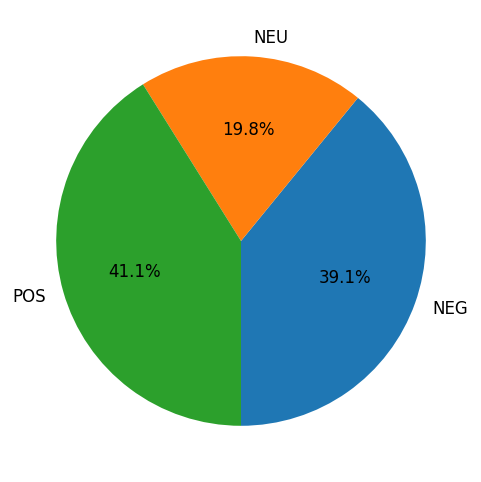

In [10]:
import matplotlib.pyplot as plt

# Let's count the number of tweets by sentiments
sentiment_counts = df.groupby(['sentiment']).size()
print(sentiment_counts)


# visualize the sentiments
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="")

#wordclaud

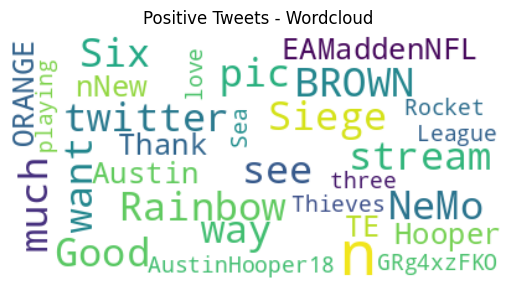

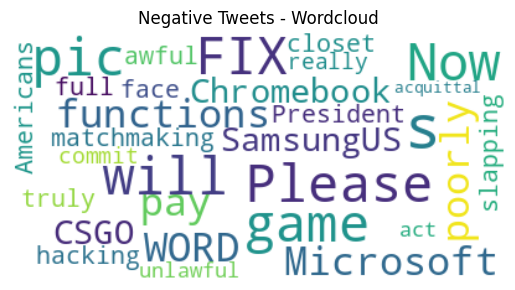

In [11]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

# Wordcloud with positive tweets
positive_tweets = df['tweet'][df["sentiment"] == 'POS']
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
positive_wordcloud = WordCloud(max_font_size=50, max_words=30, background_color="white", stopwords = stop_words).generate(str(positive_tweets))
plt.figure()
plt.title("Positive Tweets - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Wordcloud with negative tweets
negative_tweets = df['tweet'][df["sentiment"] == 'NEG']
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
negative_wordcloud = WordCloud(max_font_size=50, max_words=30, background_color="white", stopwords = stop_words).generate(str(negative_tweets))
plt.figure()
plt.title("Negative Tweets - Wordcloud")
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()